Team Members-Kanav Ohri and Venkata Krishna Rohith Dechiraju


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Read CSV

In [2]:
# Reading the csv file and setting low_memory to false as the dataset is huge.

lclub_file=pd.read_csv('loan.csv', low_memory=False)

In [3]:
#The dataset contains 111 columns and we have rough idea of data types
lclub_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Increasing the no. of columns and rows to be shown as they are huge
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
# Exploring the datatypes in detail
lclub_file.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [5]:
lclub_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning


## Column -Checklist

### The no of columns is too huge and most of them have NaN values

In [6]:
#Calculating the percentage of missing values in each column

missing_count=(lclub_file.isnull().sum()/len(lclub_file))*100
missing_count.head(120)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
#Dropping the columns which have null value corresponding to all rows
lclub_file.dropna(axis=1,how='all',inplace=True)
lclub_2=(lclub_file.isnull().sum()/len(lclub_file))*100
lclub_2

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [8]:
#Dropping the column that has more than 70% null values.
#Not deleting the next_payment_d because for loans paid it should be null.

lclub_file.drop(['mths_since_last_record'],axis=1,inplace=True)
lclub_3=(lclub_file.isnull().sum()/len(lclub_file))*100
print(lclub_3)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# Checking the size after deleting the null columns which has reduced to almost half.
lclub_file.shape

(39717, 56)

In [10]:
lclub_file.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Checking for duplicate loans and multiple loans for a customer if any

In [11]:
#The no. of unique loans ensure we are not analaysing one laon multiple times.
# As this matches with the no. of rows,so we are good to go ahead.
lclub_file.id.nunique()

39717

In [12]:
#Checking if a member has taken multiple loans
# As the no. of unique ids is same to no. of loans so no member has taken/issued two loans.
lclub_file.member_id.nunique()

39717

### So far I have come to know the rows that I have are all Unique and none of the loans or members are duplicated.This implies one member is given one loan at a time.

### So,no processing required on rows till now

### Renaming Columns

In [13]:
# Renaming columns that have abbreviated names hard to understand

lclub_file=lclub_file.rename(index=str,columns={'loan_amnt':'loan_amount','funded_amnt':'funded_amount','funded_amnt_inv':'invester_funded_amount',
                    'int_rate':'interest_rate','installment':'monthly_installment','emp_length':'emp_duration','annual_inc':'annual_income',
                    'issue_d':'issue_date','dti':'debt_income_ratio','last_pymnt_d':'last_payment_date','next_pymnt_d':'next_payment_date',
                    'last_credit_pull_d':'last_credit_pull_date','addr_state':'address_state'})

### Removing columns not needed for analysis

In [14]:
# Removing id because we don't need member related analysis,we need as a population/group.
# Removing memebr_id because same reason as above.
# 'emp_title' because employment length is given so we don't need the place where a person works.
#'url'-It contains loan id and website address of lending club,so won't be of any use.
# 'desc'-We have purpose and title of loan so this field is not needed.
# 'zip_code'-Only first three digits are given and we have address state too so this is repetitive information.
# 'pymnt_plan'-is n for all and however duration of laon is given so not needed.

lclub_file.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code','pymnt_plan'], axis=1, inplace=True)

In [15]:
# Looking at the data types to convert them to appropriate dtype.
lclub_file.dtypes

loan_amount                     int64
funded_amount                   int64
invester_funded_amount        float64
term                           object
interest_rate                  object
monthly_installment           float64
grade                          object
sub_grade                      object
emp_duration                   object
home_ownership                 object
annual_income                 float64
verification_status            object
issue_date                     object
loan_status                    object
purpose                        object
title                          object
address_state                  object
debt_income_ratio             float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc   

### Converting Columns to useful format like date,removing % and strings

In [16]:
# Issue Date Column needs to be corrected

lclub_file['issue_date']=lclub_file['issue_date'].apply(lambda row: datetime.strptime(row,"%b-%y"))
lclub_file['issue_date']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
8       2011-12-01
9       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
13      2011-12-01
14      2011-12-01
15      2011-12-01
16      2011-12-01
17      2011-12-01
18      2011-12-01
19      2011-12-01
20      2011-12-01
21      2011-12-01
22      2011-12-01
23      2011-12-01
24      2011-12-01
25      2011-12-01
26      2011-12-01
27      2011-12-01
28      2011-12-01
29      2011-12-01
30      2011-12-01
31      2011-12-01
32      2011-12-01
33      2011-12-01
34      2011-12-01
35      2011-12-01
36      2011-12-01
37      2011-12-01
38      2011-12-01
39      2011-12-01
40      2011-12-01
41      2011-12-01
42      2011-12-01
43      2011-12-01
44      2011-12-01
45      2011-12-01
46      2011-12-01
47      2011-12-01
48      2011-12-01
49      2011-12-01
50      2011-12-01
51      2011-12-01
52      2011

In [17]:
# Same for Earliest Credit Line
lclub_file['earliest_cr_line']= lclub_file['earliest_cr_line'].apply(lambda row: datetime.strptime(row,"%b-%y"))
lclub_file['earliest_cr_line']


0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
5       2004-11-01
6       2005-07-01
7       2007-01-01
8       2004-04-01
9       2004-09-01
10      1998-01-01
11      1989-10-01
12      2004-04-01
13      2003-07-01
14      1991-05-01
15      2007-09-01
16      1998-10-01
17      1993-08-01
18      2003-10-01
19      2001-01-01
20      1997-11-01
21      1983-02-01
22      1985-07-01
23      2003-04-01
24      2001-06-01
25      2002-02-01
26      2003-10-01
27      2003-10-01
28      1984-08-01
29      2006-11-01
30      1987-12-01
31      1981-11-01
32      1997-02-01
33      2005-04-01
34      2007-10-01
35      2005-07-01
36      2000-12-01
37      2004-11-01
38      2007-04-01
39      2001-12-01
40      2003-01-01
41      1994-03-01
42      1998-09-01
43      2004-06-01
44      1995-11-01
45      1999-07-01
46      1995-06-01
47      2006-11-01
48      1992-09-01
49      2002-01-01
50      1992-04-01
51      1999-07-01
52      2004

In [18]:
# lclub['last_payment_date'] has null values,but will see in univariate anlaysis if this is needed for analysis,if not will drop

#lclub['last_payment_date']=lclub['last_payment_date'].apply(lambda row: datetime.strptime(row,"%b-%y"))
lclub_file['last_payment_date']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
5        Jan-15
6        May-16
7        Jan-15
8        Apr-12
9        Nov-12
10       Jun-13
11       Sep-13
12       Jul-12
13       Jan-15
14       Oct-13
15       Jan-15
16       Jan-15
17       May-13
18       Feb-15
19       Jul-12
20       Aug-15
21       Sep-13
22       Jan-15
23       Oct-13
24       Oct-12
25       Sep-12
26          NaN
27       Dec-12
28       Apr-13
29       Dec-14
30       Jan-15
31       Aug-13
32       May-16
33       Jan-15
34       Jan-15
35       Jan-15
36       Nov-13
37       Jan-14
38       Apr-14
39       May-16
40       Jan-15
41       Jan-15
42       Jan-15
43       Jan-15
44       Jul-12
45       Jan-15
46       Aug-14
47       Jan-15
48       Jul-12
49       Jan-15
50       Oct-14
51       Jan-15
52       Jan-15
53       Aug-12
54       Jul-14
55       Oct-14
56       Oct-13
57       Jul-13
58       Aug-12
59       Jan-15
          ...  
39657    Apr-10
39658   

In [19]:
# lclub['next_payment_date'] has null values,but will see in univariate anlaysis if this is needed for analysis,if not will drop
#lclub['next_payment_date']=lclub['next_payment_date'].apply(lambda row: datetime.strptime(row,"%b-%y"))
lclub_file['next_payment_date']

0           NaN
1           NaN
2           NaN
3           NaN
4        Jun-16
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32       Jun-16
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39       Jun-16
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
46          NaN
47          NaN
48          NaN
49          NaN
50          NaN
51          NaN
52          NaN
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59          NaN
          ...  
39657       NaN
39658   

In [20]:
#lclub['last_credit_pull_date']=lclub['last_credit_pull_date'].apply(lambda row: datetime.strptime(row,"%b-%y"))
lclub_file['last_credit_pull_date']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
5        Jan-16
6        May-16
7        Dec-14
8        Aug-12
9        Mar-13
10       Dec-15
11       Aug-13
12       Nov-12
13       May-16
14       Mar-14
15       May-16
16       Apr-15
17       May-14
18       Jul-15
19       Feb-16
20       Mar-16
21       May-16
22       May-16
23       Mar-14
24       Mar-13
25       Sep-12
26       May-16
27       May-13
28       May-16
29       Jan-15
30       Dec-14
31       Feb-16
32       Apr-16
33       May-16
34       Dec-14
35       May-16
36       Jan-16
37       May-16
38       May-16
39       May-16
40       Dec-14
41       May-16
42       May-16
43       Dec-15
44       Jun-12
45       Apr-16
46       Dec-14
47       Apr-16
48       Apr-16
49       Apr-16
50       Mar-15
51       May-16
52       Dec-14
53       Dec-12
54       Mar-16
55       May-16
56       May-16
57       Mar-15
58       Sep-14
59       May-16
          ...  
39657    Jan-12
39658   

In [21]:
#Removing string months and converting the column to int type

lclub_file['term']=lclub_file['term'].str.extract('([0-9]+)',expand=False).astype(int)
lclub_file['term']

0        36
1        60
2        36
3        36
4        60
5        36
6        60
7        36
8        60
9        60
10       60
11       36
12       36
13       36
14       36
15       36
16       36
17       36
18       36
19       36
20       60
21       36
22       36
23       36
24       36
25       36
26       36
27       60
28       36
29       36
30       36
31       36
32       60
33       36
34       36
35       36
36       36
37       36
38       36
39       60
40       36
41       36
42       36
43       36
44       36
45       36
46       36
47       36
48       36
49       36
50       36
51       36
52       36
53       36
54       36
55       60
56       60
57       36
58       36
59       36
         ..
39657    36
39658    36
39659    36
39660    36
39661    36
39662    36
39663    36
39664    36
39665    36
39666    36
39667    36
39668    36
39669    36
39670    36
39671    36
39672    36
39673    36
39674    36
39675    36
39676    36
39677    36
39678    36
3967

In [22]:
#Removing % from interest rate and converting it to float type data

lclub_file['interest_rate']=lclub_file['interest_rate'].str.replace('%','').astype(float)
lclub_file['interest_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
30        7.51
31        7.90
32       15.96
33        8.90
34       15.96
35       10.65
36        9.91
37        7.90
38       12.42
39       12.69
40        7.51
41        7.90
42       18.25
43       16.77
44        6.03
45        9.91
46        8.90
47       10.65
48        6.03
49        6.62
50        9.91
51        9.91
52       10.65
53       15.96
54        9.91
55       19.91
56       19.91
57       12.42
58       10.65
59       16.77
         ...  
39657    12.17
39658     8.70
39659     9.64
39660     8.70
39661     7.75
39662     

In [23]:
# Removing % and converting to float
lclub_file['revol_util']=lclub_file['revol_util'].str.replace('%','').astype(float)
lclub_file['revol_util']


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
30       86.90
31       27.40
32       63.60
33       29.30
34       60.50
35       57.20
36       13.30
37       50.40
38       66.50
39       50.00
40       18.10
41       21.00
42       98.10
43       99.00
44       32.50
45       13.40
46       62.10
47       52.30
48       19.50
49       36.40
50       63.70
51       62.00
52       92.90
53       90.80
54       52.10
55       97.60
56       75.10
57       72.70
58       59.10
59       91.20
         ...  
39657    36.20
39658    30.70
39659    14.90
39660    14.90
39661     0.70
39662     

## The objective says to analyse factors/trends for defaulted loans which means
## we need to subset the data into three types of loans and then proceed with
## 'charged-off' status loan.

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


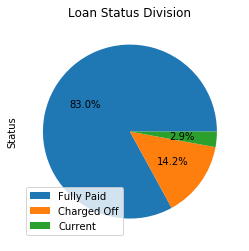

In [24]:
# Finidng types of loan status and to consider whole data for analysis or not
print(lclub_file['loan_status'].value_counts())

#Plotting a pie chart for visualisation
plt.pie(lclub_file['loan_status'].value_counts(),autopct='%1.1f%%')
plt.ylabel("Status")
plt.title("Loan Status Division")
plt.legend(['Fully Paid','Charged Off','Current'],loc=3)
plt.show()

#As 83% of loans are fully paid so it would eb bias to analyse trends on whole data,so segmenting the data into three parts.

In [25]:
# As the current and fully paid data is huge,so extracting only charged off loans
# Selcting the datasset that has loan_status as charged off
lclub=lclub_file[lclub_file['loan_status']=='Charged Off']
lclub.head()

,loan_amount,funded_amount,invester_funded_amount,term,interest_rate,monthly_installment,grade,sub_grade,emp_duration,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,title,address_state,debt_income_ratio,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_pymnt_amnt,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,2004-04-01,2,NaN,11,0,5210,32.6,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,Building my credit history.,TX,18.08,0,2004-09-01,0,NaN,2,0,9279,36.5,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,NaN,4,0,10452,91.7,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,Other Loan,CA,7.06,0,1991-05-01,2,NaN,14,0,11997,55.5,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Univariate Analysis

Taking 10 columns at a time

In [26]:
# Selecting first 10 Columns

lclub_10=lclub.iloc[:,:10]
lclub_10.head()

,loan_amount,funded_amount,invester_funded_amount,term,interest_rate,monthly_installment,grade,sub_grade,emp_duration,home_ownership
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT
12,9000,9000,9000.0,36,13.49,305.38,C,C1,< 1 year,RENT
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3 years,RENT


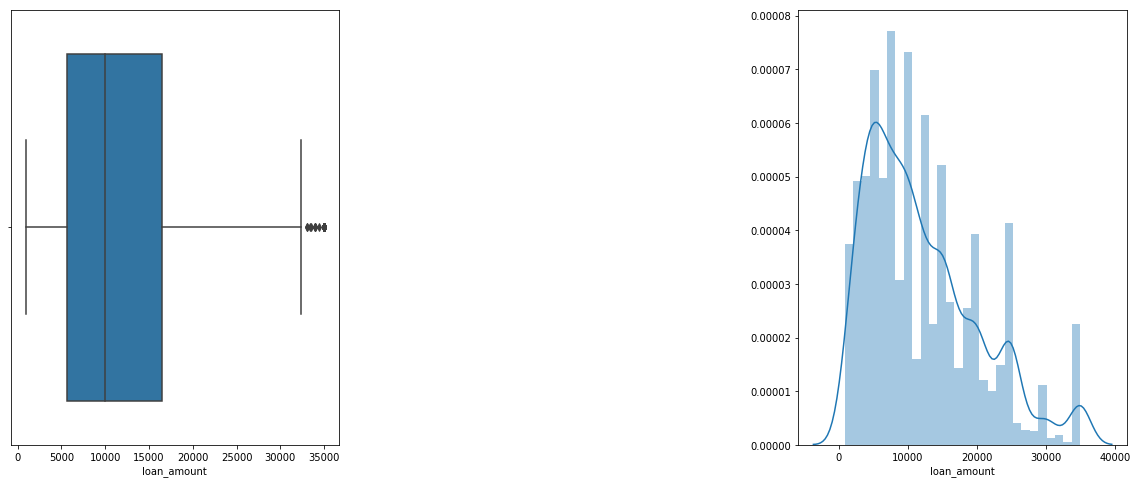

In [27]:
# Creating a boxplot to find outliers
plt.subplots(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.boxplot(x=lclub.loan_amount)

plt.subplot(1, 3, 3)
sns.distplot(lclub.loan_amount)

plt.show()

In [28]:
# Removing outliers from dataset
#Q1 = lclub['loan_amount'].quantile(0.25)
#Q3 = lclub['loan_amount'].quantile(0.75)
#IQR = Q3 - Q1

# Applying Capping Rule
low_range= np.percentile(lclub.loan_amount,5)#Q1-1.5*IQR
high_range= np.percentile(lclub.loan_amount,95)#Q3+1.5*IQR
print(low_range)
print(high_range)
lclub=lclub.loc[(lclub['loan_amount']>=low_range) & (lclub['loan_amount']<=high_range) ]
lclub

2400.0
27300.0


,loan_amount,funded_amount,invester_funded_amount,term,interest_rate,monthly_installment,grade,sub_grade,emp_duration,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,title,address_state,debt_income_ratio,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_pymnt_amnt,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,2500,2500,2500.000000,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.000000,117.080000,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,5600,5600,5600.000000,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,2004-04-01,2,NaN,11,0,5210,32.6,13,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.000000,189.060000,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,5375,5375,5350.000000,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,Building my credit history.,TX,18.08,0,2004-09-01,0,NaN,2,0,9279,36.5,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.000000,269.290000,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,9000,9000,9000.000000,36,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,NaN,4,0,10452,91.7,9,f,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.000000,444.300000,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,10000,10000,10000.000000,36,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,Other Loan,CA,7.06,0,1991-05-01,2,NaN,14,0,11997,55.5,29,f,0.0,0.0,7471.990000,7471.99,5433.47,1393.42,0.000000,645.100000,6.3145,Oct-13,325.74,NaN,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
21,21000,21000,21000.000000,36,12.42,701.73,B,B4,10+ years,RENT,105000.0,Verified,2011-12-01,Charged Off,debt_consolidation,Debt Cleanup,FL,13.22,0,1983-02-01,0,NaN,7,0,32135,90.3,38,f,0.0,0.0,14025.400000,14025.40,10694.96,3330.44,0.000000,0.000000,0.0000,Sep-13,701.73,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
24,6000,6000,6000.000000,36,11.71,198.46,B,B3,1 year,RENT,76000.0,Not Verified,2011-12-01,Charged Off,major_purchase,cash,CA,2.40,0,2001-06-01,1,NaN,7,0,5963,29.7,7,f,0.0,0.0,2050.140000,2050.14,1305.58,475.25,0.000000,269.310000,2.5700,Oct-12,198.46,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
26,15000,15000,8725.000000,36,14.27,514.64,C,C2,9 years,RENT,60000.0,Not Verified,2011-12-01,Charged Off,debt_consolidation,consolidation,NY,15.22,0,2003-10-01,1,NaN,7,0,5872,57.6,11,f,0.0,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.0000,NaN,0.00,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
27,5000,5000,5000.000000,60,16.77,123.65,D,D2,2 years,RENT,50004.0,Not Verified,2011-12-01,Charged Off,other,Other,PA,13.97,3,2003-10-01,0,20.0,14,0,4345,59.5,22,f,0.0,0.0,1609.120000,1609.12,629.05,719.11,0.000000,260.960000,2.3000,Dec-12,123.65,NaN,May-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
46,5000,5000,5000.000000,36,8.90,158.77,A,A5,10+ years,MORTGAGE,100000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,Debt Consolidation for a better life,OH,16.33,0,1995-06-01,0,NaN,17,0,74351,62.1,35,f,0.0,0.0,5021.370000,5021.37,4217.38,696.99,0.000000,107.000000,1.0700,Aug-14,158.77,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


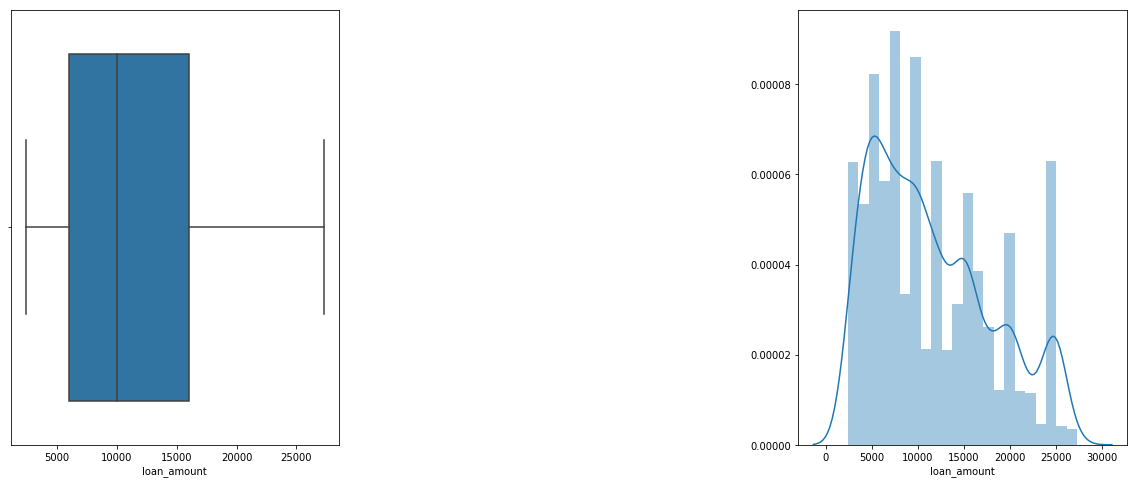

In [29]:
# Checking the condition of data after removing outliers,it is still not normal distribution but we will continue with analysis

plt.subplots(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.boxplot(x=lclub.loan_amount)

plt.subplot(1, 3, 3)
sns.distplot(lclub.loan_amount)

plt.show()

In [30]:
lclub.loan_amount.describe()


count     5068.000000
mean     11547.025454
std       6508.318212
min       2400.000000
25%       6000.000000
50%      10000.000000
75%      16000.000000
max      27300.000000
Name: loan_amount, dtype: float64

### Most of the loans given are in range of 5500 to 16000
###  Average loan amount is 10000,the median as graph is skewed to right.

In [31]:
print(lclub['term'].value_counts())




36    2951
60    2117
Name: term, dtype: int64


### looking at the data,the loans are given either for 3 years or 5 years.
### More loans are taken for 3 years.So,The most popular option is 36 months.

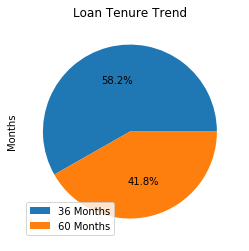

In [32]:
#Generating a pie chart for Loan Tenure/Duration Trend for ppt
plt.pie(lclub['term'].value_counts(),autopct='%1.1f%%')
plt.ylabel("Months")
plt.title("Loan Tenure Trend")
plt.legend(['36 Months','60 Months'],loc=3)
plt.show()

In [33]:
print(lclub['interest_rate'].describe())
#The average interest rate of 13.5%.Mean and median are almost same.

count    5068.000000
mean       13.715239
std         3.574652
min         5.420000
25%        11.140000
50%        13.490000
75%        16.320000
max        24.400000
Name: interest_rate, dtype: float64


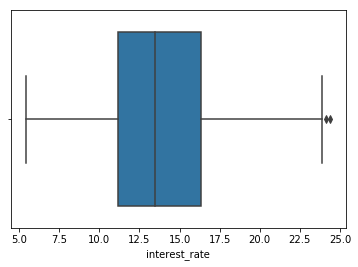

In [34]:
sns.boxplot(x=lclub['interest_rate'])
plt.show()
#There are some people taking loan at at very high interest rate than average.


In [35]:
print(lclub['monthly_installment'].describe())
#Here,the installment is monthly istallment,so annually someone needs to pay 12*installment.

count    5068.000000
mean      325.569698
std       182.946140
min        32.250000
25%       177.675000
50%       293.880000
75%       430.780000
max       950.120000
Name: monthly_installment, dtype: float64


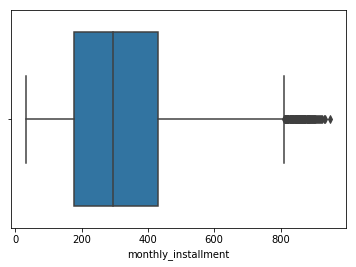

In [36]:
sns.boxplot(x=lclub['monthly_installment'])
plt.show()
#There are nany people who are paying higher installments than average,so it would be good to find a relation between their income,dti and other
#factors related to money.

B    1308
C    1227
D    1028
E     618
A     543
F     259
G      85
Name: grade, dtype: int64


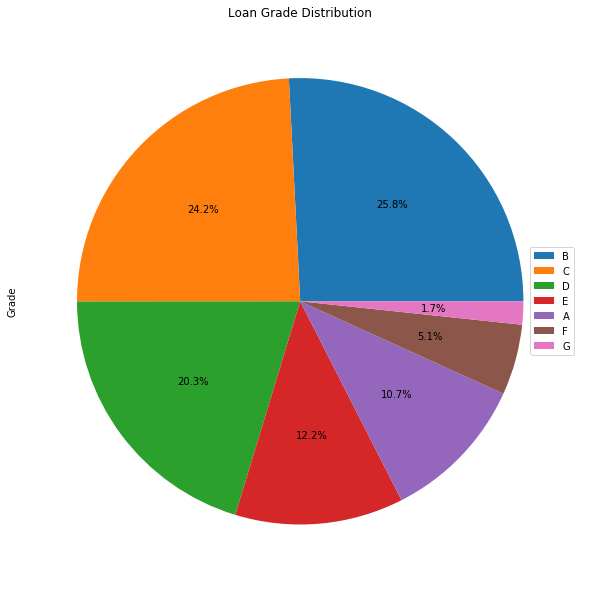

In [37]:
print(lclub['grade'].value_counts())
plt.figure(figsize=(10,20))
plt.pie(lclub['grade'].value_counts(),autopct='%1.1f%%')
plt.ylabel("Grade")
plt.title("Loan Grade Distribution")
plt.legend(['B','C','D','E','A','F','G'],loc=7)
plt.show()
# Most of the loans are B-C-D category. Still,it is not clear on what basis LC Assigns these grades.
#Will look in bivariate abalysis to find a relation between loan amount,annual income,interest rate and grade.
#Loan grading is a classification system that involves assigning a quality score to a loan based 
#on a borrower's credit history, quality of collateral and likelihood of repayment of the principal and interest.

In [38]:
print(lclub['sub_grade'].value_counts())
#subgrading clearly has 5 levelsand B5,B3,C1 are most common subgrades.

B5    331
B3    316
C1    301
B4    297
C2    292
D2    253
C3    245
D3    232
B2    206
A5    199
D4    198
C4    198
C5    191
D5    191
E1    172
A4    158
B1    158
D1    154
E2    139
E4    112
E3    107
A3     93
E5     88
F1     72
A2     67
F2     61
F3     43
F4     42
F5     41
A1     26
G2     24
G1     24
G3     16
G4     11
G5     10
Name: sub_grade, dtype: int64


In [39]:
print(lclub['emp_duration'].value_counts())
# Most of the people who are deafulting loans are employed for more than 10 years
# At this experience the reason to take a loan can be found using the title column and home ownership.

10+ years    1174
< 1 year      569
2 years       511
3 years       500
5 years       424
4 years       423
1 year        422
6 years       289
7 years       237
8 years       182
9 years       147
Name: emp_duration, dtype: int64


In [40]:
print(lclub['home_ownership'].value_counts())
#Most of the people taking loan either rent a house or have mortgaged one.
#This is very clear that people are buying homes or have taken loans to buy home.

RENT        2583
MORTGAGE    2066
OWN          401
OTHER         18
Name: home_ownership, dtype: int64


In [41]:
lclub['title']=lclub['title'].str.lower()
lclub['title'].value_counts()

# MOst people defaulting are taking loan for debt consolidation,personal reasons,small business and home improvement

debt consolidation                           430
debt consolidation loan                      257
personal loan                                131
consolidation                                 88
personal                                      86
small business loan                           77
home improvement                              70
consolidation loan                            50
loan                                          43
credit card consolidation                     41
credit card loan                              37
other loan                                    30
car loan                                      30
my loan                                       29
home improvement loan                         25
freedom                                       24
debt                                          23
medical                                       22
business loan                                 22
payoff                                        21
credit card payoff  

## Next 10 columns

In [42]:
lclub_20=lclub.iloc[:,10:20]
lclub_20.head()

,annual_income,verification_status,issue_date,loan_status,purpose,title,address_state,debt_income_ratio,delinq_2yrs,earliest_cr_line
1,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01
8,40000.0,Source Verified,2011-12-01,Charged Off,small_business,expand business & buy debt portfolio,CA,5.55,0,2004-04-01
9,15000.0,Verified,2011-12-01,Charged Off,other,building my credit history.,TX,18.08,0,2004-09-01
12,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01
14,100000.0,Source Verified,2011-12-01,Charged Off,other,other loan,CA,7.06,0,1991-05-01


In [43]:
print(lclub['annual_income'].describe())
# Average income of defaulters is 52,347.

count    5.068000e+03
mean     6.139900e+04
std      4.662975e+04
min      6.000000e+03
25%      3.780000e+04
50%      5.234700e+04
75%      7.250000e+04
max      1.250000e+06
Name: annual_income, dtype: float64


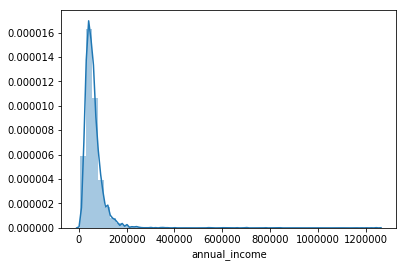

In [44]:
sns.distplot(lclub['annual_income'])
plt.show()

# the graph clearly shows,the people taking loans are of low income group. 

In [45]:
lclub['annual_income'].mode()
#The most common measure would be mode i.e 60,000.MOst people taking loan are earning around 60,000 annually.


0    60000.0
dtype: float64

In [46]:
print(lclub['verification_status'].value_counts())

#The bank is giving loan to a huge no. of unverified customers which is a high risk of defaulting.

Not Verified       1967
Verified           1783
Source Verified    1318
Name: verification_status, dtype: int64


In [47]:
#Let's break down the Isuue_date to year and month to find in which months and year the most loans are issued.
lclub['loan_year']=lclub['issue_date'].dt.year
lclub['loan_month']=lclub['issue_date'].dt.month

print('Year \n',lclub['loan_year'].value_counts())

print('Month \n',lclub['loan_month'].value_counts())


#The most loans are given in the year of 2011 and are given in the October-December Quarter.


Year 
 2011    2826
2010    1399
2009     565
2008     239
2007      39
Name: loan_year, dtype: int64
Month 
 12    612
11    531
10    519
9     489
7     433
8     427
6     420
5     417
4     329
3     314
1     311
2     266
Name: loan_month, dtype: int64


In [48]:
lclub['purpose'].value_counts()

#A huge number of people are taking loans to clear debts
#As per Google-"Debt consolidation is a form of debt refinancing that entails taking out one loan to pay off many others."
# This is a risky factor for giving loan.

debt_consolidation    2527
other                  540
credit_card            510
small_business         420
home_improvement       305
major_purchase         206
car                    151
medical                 92
wedding                 87
moving                  73
house                   50
educational             48
vacation                40
renewable_energy        19
Name: purpose, dtype: int64

In [49]:
lclub['address_state'].value_counts()

#Most no. of loans are being taken in the state of CA

CA    1023
FL     460
NY     455
TX     270
NJ     258
GA     192
IL     180
PA     157
VA     155
MA     148
MD     142
OH     137
WA     122
AZ     114
MO     104
NC      95
NV      93
MI      88
CT      87
CO      86
MN      74
SC      60
OR      60
WI      56
LA      47
AL      46
KY      40
OK      38
UT      35
KS      29
NM      27
HI      26
RI      24
NH      22
AR      21
WV      19
AK      15
DC      13
DE      12
SD      12
MT       9
VT       6
WY       3
NE       3
MS       2
TN       2
ID       1
Name: address_state, dtype: int64

In [50]:
lclub['debt_income_ratio'].describe()

# average DTI for defaulters is 14.

count    5068.000000
mean       13.956075
std         6.569096
min         0.000000
25%         9.050000
50%        14.210000
75%        19.282500
max        29.850000
Name: debt_income_ratio, dtype: float64

In [51]:
lclub['delinq_2yrs'].value_counts()
# the people who have skipped monthly payments by more than a month

0    4449
1     450
2     118
3      34
4      12
5       2
7       1
6       1
8       1
Name: delinq_2yrs, dtype: int64

count    5068.000000
mean       14.027427
std         6.744764
min         3.000000
25%        10.000000
50%        13.000000
75%        17.000000
max        49.000000
Name: cr_line_age, dtype: float64
2000    445
1999    399
1998    369
1997    352
2001    321
1995    274
1996    271
1994    238
2002    226
2005    218
2003    211
2004    208
2006    203
1993    169
2007    130
1991    128
1992    116
1990    114
1989    105
1988     99
1987     74
1985     57
1983     49
1986     46
1984     44
1979     28
1982     23
2008     23
1981     20
1978     18
1980     16
1977     11
1973     10
1975      9
1972      8
1970      7
1967      5
1974      5
1976      4
1968      4
1971      3
1969      2
1966      2
1962      2
1965      1
1963      1
Name: earliest_cr_line_year, dtype: int64


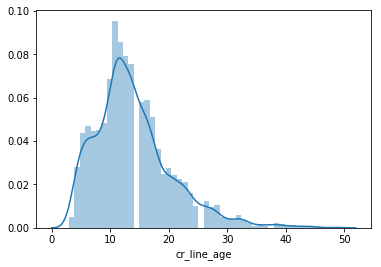

In [52]:
lclub['earliest_cr_line_year']= pd.DatetimeIndex(lclub['earliest_cr_line']).year
lclub['earliest_cr_line_year']=lclub['earliest_cr_line_year'].apply(lambda x:(x-100) if (x>2011) else x)
lclub['cr_line_age']=lclub['earliest_cr_line_year'].apply(lambda x:2011-x)
print(lclub['cr_line_age'].describe())
print(lclub['earliest_cr_line_year'].value_counts())
sns.distplot(lclub['cr_line_age'])
plt.show()

#The month the borrower's earliest reported credit line was opened.This tells a lot of customers who are associated with 
#the club from 1997-2000 have defaulted.


In [53]:
lclub['inq_last_6mths'].value_counts()

#The inquiries made by borrower to lending club.
#the people who do not make much enquiries are defaulting.So,people might be unknown/unverified categorically,

0    2069
1    1493
2     856
3     556
4      44
5      23
6      15
7       9
8       3
Name: inq_last_6mths, dtype: int64

# Next 10 columns

In [54]:
lclub_30=lclub.iloc[:,20:30]
lclub_30.head()

,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv
1,5,NaN,3,0,1687,9.4,4,f,0.0,0.0
8,2,NaN,11,0,5210,32.6,13,f,0.0,0.0
9,0,NaN,2,0,9279,36.5,3,f,0.0,0.0
12,1,NaN,4,0,10452,91.7,9,f,0.0,0.0
14,2,NaN,14,0,11997,55.5,29,f,0.0,0.0


In [55]:
lclub['mths_since_last_delinq'].describe()

#People who default have been missing payments at an average of 35 months.

count    1944.000000
mean       36.367284
std        22.642035
min         0.000000
25%        18.000000
50%        35.000000
75%        53.000000
max       107.000000
Name: mths_since_last_delinq, dtype: float64

count    5068.000000
mean        9.225138
std         4.536372
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64


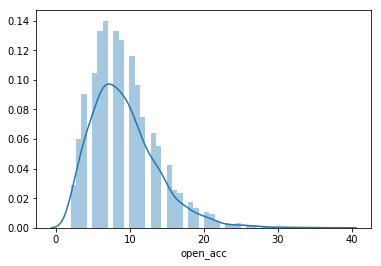

In [56]:
print(lclub['open_acc'].describe())

sns.distplot(lclub['open_acc'])
plt.show()

#The no. of open credit lines is huge for a large no. of people.It means they have taken multiple loans.
# At an average people having 9 accounts are defaulting.


In [57]:
lclub['pub_rec'].value_counts()

#The number of derogatory public records are not available for large no. of people.
#Which is a good news that large no. of people have good reputation in public.This is a deceiving factor.

0    4639
1     419
2      10
Name: pub_rec, dtype: int64

### Revol_bal  shows a clear trend to us.People keep on shifting their loans from one account ot another.


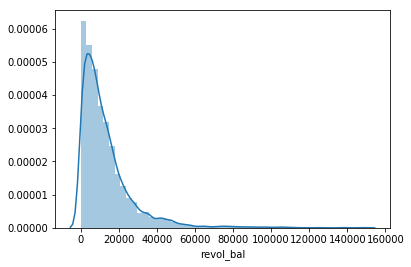

In [58]:
lclub['revol_bal'].describe()
sns.distplot(lclub['revol_bal'])
plt.show()
#

In [59]:
lclub['revol_util'].describe()

# As per google,the good revolving utilization should be less than 30%.Most defaulters fall above 30%.

count    5057.000000
mean       55.615725
std        27.702101
min         0.000000
25%        34.500000
50%        58.400000
75%        78.800000
max        99.900000
Name: revol_util, dtype: float64

In [60]:
lclub['total_acc'].describe()

#The total number of credit lines currently in the borrower's credit file
#People having 20 average credit lines/sources are defaulting.
#observe open/total credit line ratio.

count    5068.000000
mean       21.351223
std        11.331721
min         2.000000
25%        13.000000
50%        19.000000
75%        28.000000
max        74.000000
Name: total_acc, dtype: float64

In [61]:
df=lclub['out_prncp'][lclub['out_prncp']!=0]
len(df)

#Remaining outstanding principal for total amount funded.This is not filled properly and not needed for analysis.
# So not imputing it or correcting it.

0

In [62]:
df1=lclub['out_prncp_inv'][lclub['out_prncp_inv']!=0]
len(df1)

#Remaining outstanding principal for portion of total amount funded by investors.
#This is not filled properly and is not needed for analysis.


0

In [63]:
lclub['total_pymnt']
#Payments received to date for total amount funded.This should be sum of total_rec_prncp+total_rec_int+recovery.
# it can be used to see the trend after how much payment the borrowers default.

1         1008.710000
8          646.020000
9         1476.190000
12        2270.700000
14        7471.990000
21       14025.400000
24        2050.140000
26           0.000000
27        1609.120000
46        5021.370000
50       16177.770000
53        3521.950000
55       18319.140000
64        8772.910000
66        5577.750000
68        4173.570000
71        4776.450000
97       10037.100000
100       2452.220000
105      18749.250000
114      11730.600000
120      23880.650000
121      11930.650000
131       5895.680000
137       8120.140000
145      11234.490000
151       6002.230000
153       6198.890000
155       1350.860000
168       1838.880000
175       9270.840000
176       6934.000000
177       5425.960000
179       3708.240000
182      13373.770000
183      10198.400000
188      12295.720000
195       4241.160000
203       8203.290000
204       2222.160000
212      15502.770000
220       7002.160000
224       7730.870000
225       9622.450000
226       6126.240000
231       

# Next 10 columns

In [64]:
lclub_40=lclub.iloc[:,30:40]
lclub_40.head()

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_pymnt_amnt,next_payment_date
1,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN
8,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN
9,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN
12,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN
14,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN


In [65]:
#total_pymnt_inv,total_rec_prncp,total_rec_int are all components of loan calculation and are not needed for analysis.

In [66]:
df1=lclub['total_rec_late_fee'][lclub['total_rec_late_fee']!=0]
print(lclub['total_rec_late_fee'].isnull().any())
len(df1)
# 766 poeple have paid late fee.This is one of the indicators.

False


766

#recoveries,collection_recover_fee,last payment date,last_pymnt_amnt,next_payment_date,last_credit_pull_date are more for operational use
#won't contribute much to the analysis.

# Last set of columns

In [67]:
lclub_52=lclub.iloc[:,40:]
lclub_52.head()

,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_year,loan_month,earliest_cr_line_year,cr_line_age
1,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1999,12
8,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,2004,7
9,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,2004,7
12,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,2004,7
14,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12,1991,20


In [68]:
#collections_12_mths_ex_med too does not seem to be contributing to analysis

In [69]:
lclub['policy_code'].value_counts()

#All the people have same policy assigned,so no variations as per loan grades and amounts.

1    5068
Name: policy_code, dtype: int64

In [70]:
lclub['application_type'].value_counts()
# All loan applications are filed by indivinduals only.

INDIVIDUAL    5068
Name: application_type, dtype: int64

In [71]:
lclub['acc_now_delinq'].value_counts()
# no accounts are delinqued for any customer
# there are customers who have not paid since many months so this record should be updated by bank

0    5068
Name: acc_now_delinq, dtype: int64

In [72]:
lclub['chargeoff_within_12_mths'].value_counts()
#No account is getting charged off within twelve months

0.0    5063
Name: chargeoff_within_12_mths, dtype: int64

In [73]:
lclub['delinq_amnt'].value_counts()

# no delinq amount exists for any customer

0    5068
Name: delinq_amnt, dtype: int64

In [74]:
lclub['pub_rec_bankruptcies'].value_counts()
#These customers having 1 or more  public bankruptcies need to be looked at and are potential to default.
# This column should be considered.

0.0    4619
1.0     336
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

In [75]:
lclub['tax_liens'].value_counts()

#This a post defaulter term so will not help in analysis.

0.0    5067
Name: tax_liens, dtype: int64

### Rest of them have been derived from the dates given above

# Preparing Data for Bivariate Analysis

In [76]:
# Dropping more columns that are not used

lclub.drop(['policy_code','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type',
            'collections_12_mths_ex_med','recoveries','collection_recovery_fee','last_payment_date','next_payment_date',
            'last_credit_pull_date','out_prncp_inv','out_prncp'],
           axis=1,
           inplace=True)

In [77]:
lclub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5068 entries, 1 to 39688
Data columns (total 39 columns):
loan_amount               5068 non-null int64
funded_amount             5068 non-null int64
invester_funded_amount    5068 non-null float64
term                      5068 non-null int32
interest_rate             5068 non-null float64
monthly_installment       5068 non-null float64
grade                     5068 non-null object
sub_grade                 5068 non-null object
emp_duration              4878 non-null object
home_ownership            5068 non-null object
annual_income             5068 non-null float64
verification_status       5068 non-null object
issue_date                5068 non-null datetime64[ns]
loan_status               5068 non-null object
purpose                   5068 non-null object
title                     5066 non-null object
address_state             5068 non-null object
debt_income_ratio         5068 non-null float64
delinq_2yrs               5068 non-null i

# Bivariate Analysis

In [78]:
# Imputing all the null values with 0 to genrate corrleation matrix
lclub.fillna(0)

,loan_amount,funded_amount,invester_funded_amount,term,interest_rate,monthly_installment,grade,sub_grade,emp_duration,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,title,address_state,debt_income_ratio,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_year,loan_month,earliest_cr_line_year,cr_line_age
1,2500,2500,2500.000000,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,0.0,3,0,1687,9.4,4,f,1008.710000,1008.71,456.46,435.17,0.000000,119.66,0.0,2011,12,1999,12
8,5600,5600,5600.000000,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,expand business & buy debt portfolio,CA,5.55,0,2004-04-01,2,0.0,11,0,5210,32.6,13,f,646.020000,646.02,162.02,294.94,0.000000,152.39,0.0,2011,12,2004,7
9,5375,5375,5350.000000,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,building my credit history.,TX,18.08,0,2004-09-01,0,0.0,2,0,9279,36.5,3,f,1476.190000,1469.34,673.48,533.42,0.000000,121.45,0.0,2011,12,2004,7
12,9000,9000,9000.000000,36,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,0.0,4,0,10452,91.7,9,f,2270.700000,2270.70,1256.14,570.26,0.000000,305.38,0.0,2011,12,2004,7
14,10000,10000,10000.000000,36,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,other loan,CA,7.06,0,1991-05-01,2,0.0,14,0,11997,55.5,29,f,7471.990000,7471.99,5433.47,1393.42,0.000000,325.74,0.0,2011,12,1991,20
21,21000,21000,21000.000000,36,12.42,701.73,B,B4,10+ years,RENT,105000.0,Verified,2011-12-01,Charged Off,debt_consolidation,debt cleanup,FL,13.22,0,1983-02-01,0,0.0,7,0,32135,90.3,38,f,14025.400000,14025.40,10694.96,3330.44,0.000000,701.73,0.0,2011,12,1983,28
24,6000,6000,6000.000000,36,11.71,198.46,B,B3,1 year,RENT,76000.0,Not Verified,2011-12-01,Charged Off,major_purchase,cash,CA,2.40,0,2001-06-01,1,0.0,7,0,5963,29.7,7,f,2050.140000,2050.14,1305.58,475.25,0.000000,198.46,0.0,2011,12,2001,10
26,15000,15000,8725.000000,36,14.27,514.64,C,C2,9 years,RENT,60000.0,Not Verified,2011-12-01,Charged Off,debt_consolidation,consolidation,NY,15.22,0,2003-10-01,1,0.0,7,0,5872,57.6,11,f,0.000000,0.00,0.00,0.00,0.000000,0.00,0.0,2011,12,2003,8
27,5000,5000,5000.000000,60,16.77,123.65,D,D2,2 years,RENT,50004.0,Not Verified,2011-12-01,Charged Off,other,other,PA,13.97,3,2003-10-01,0,20.0,14,0,4345,59.5,22,f,1609.120000,1609.12,629.05,719.11,0.000000,123.65,0.0,2011,12,2003,8
46,5000,5000,5000.000000,36,8.90,158.77,A,A5,10+ years,MORTGAGE,100000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,debt consolidation for a better life,OH,16.33,0,1995-06-01,0,0.0,17,0,74351,62.1,35,f,5021.370000,5021.37,4217.38,696.99,0.000000,158.77,0.0,2011,12,1995,16


In [79]:
numeric_variables = lclub.select_dtypes(exclude=['object'])
numeric_variables.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5068 entries, 1 to 39688
Data columns (total 29 columns):
loan_amount               5068 non-null int64
funded_amount             5068 non-null int64
invester_funded_amount    5068 non-null float64
term                      5068 non-null int32
interest_rate             5068 non-null float64
monthly_installment       5068 non-null float64
annual_income             5068 non-null float64
issue_date                5068 non-null datetime64[ns]
debt_income_ratio         5068 non-null float64
delinq_2yrs               5068 non-null int64
earliest_cr_line          5068 non-null datetime64[ns]
inq_last_6mths            5068 non-null int64
mths_since_last_delinq    1944 non-null float64
open_acc                  5068 non-null int64
pub_rec                   5068 non-null int64
revol_bal                 5068 non-null int64
revol_util                5057 non-null float64
total_acc                 5068 non-null int64
total_pymnt               5068 non-nu

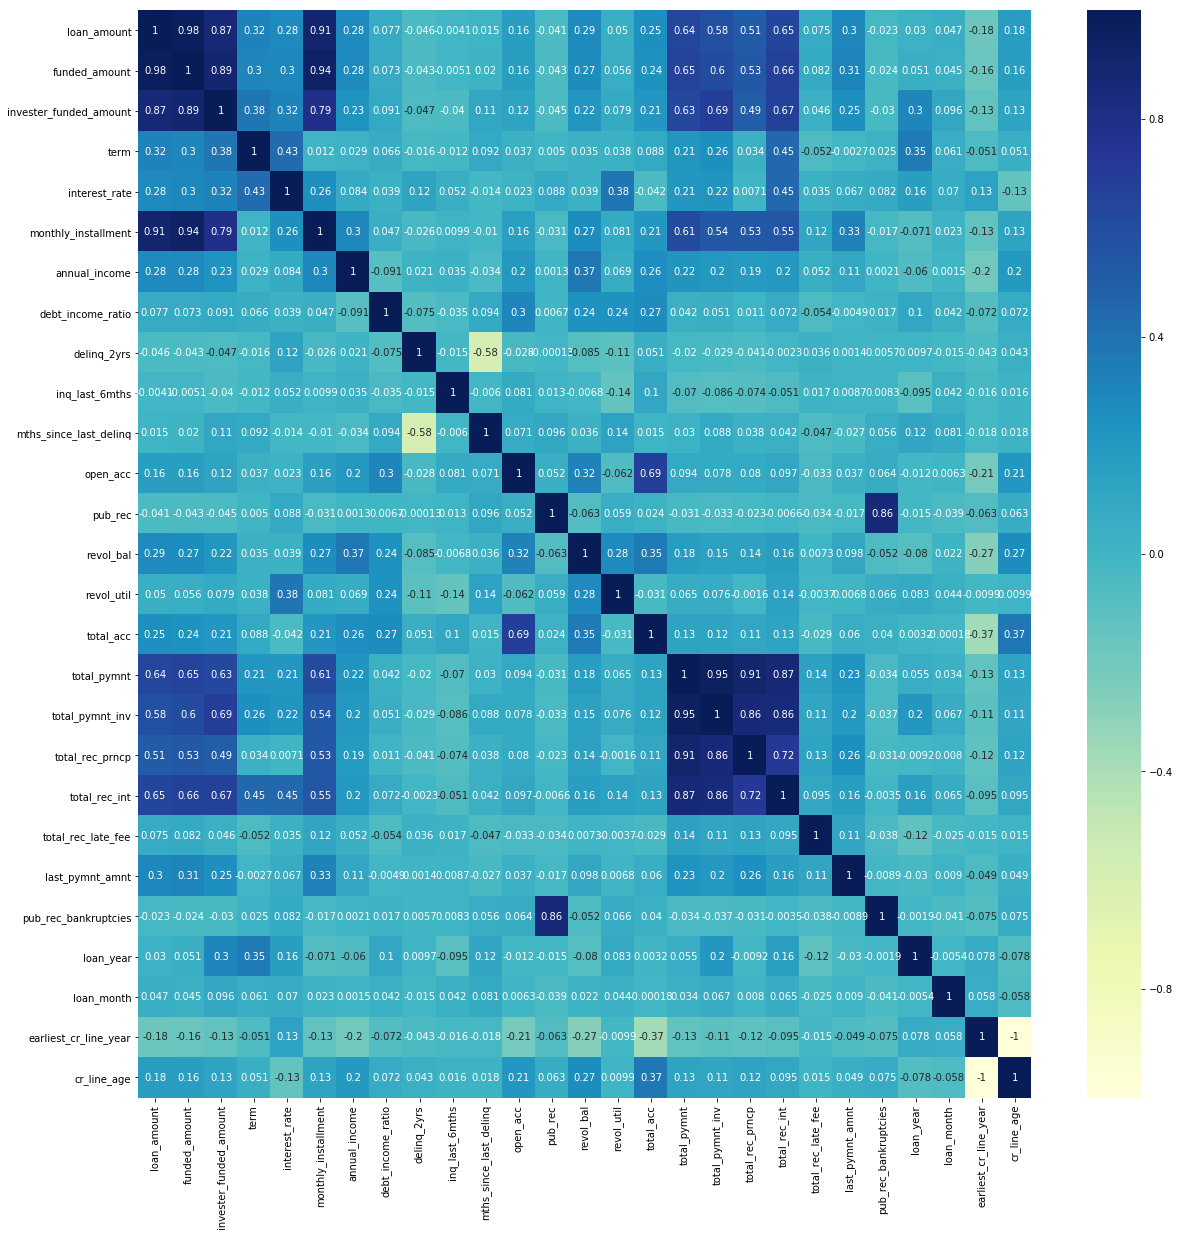

In [80]:
#numeric_variables = lclub.select_dtypes(exclude=['object'])
corr_matrix=numeric_variables.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,cmap="YlGnBu",annot=True)
plt.show()

# from the correlation matrix

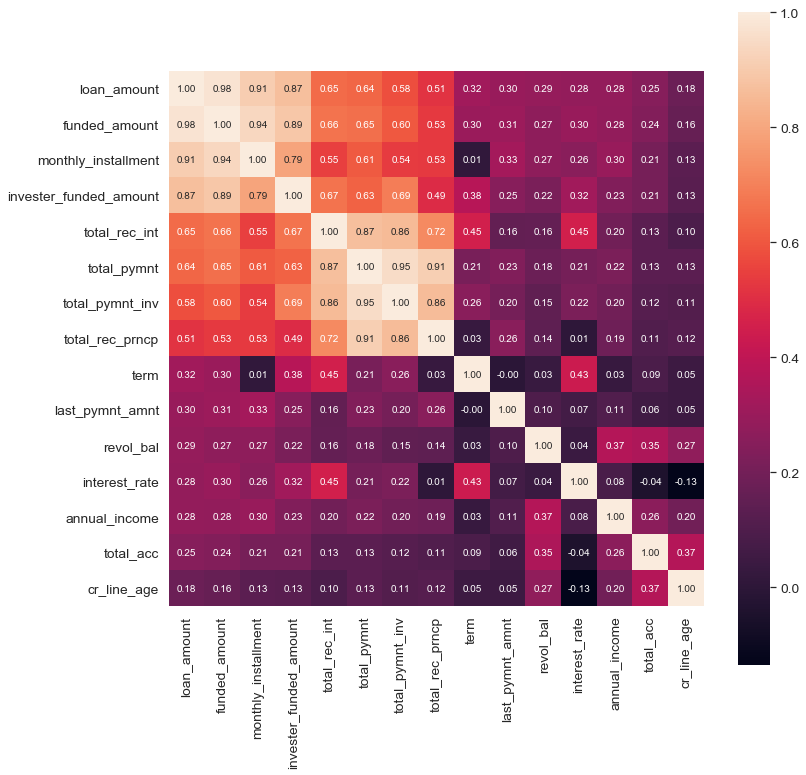

In [81]:
k = 15 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'loan_amount')['loan_amount'].index
cm = np.corrcoef(lclub[cols].values.T)
plt.figure(figsize=(12,12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

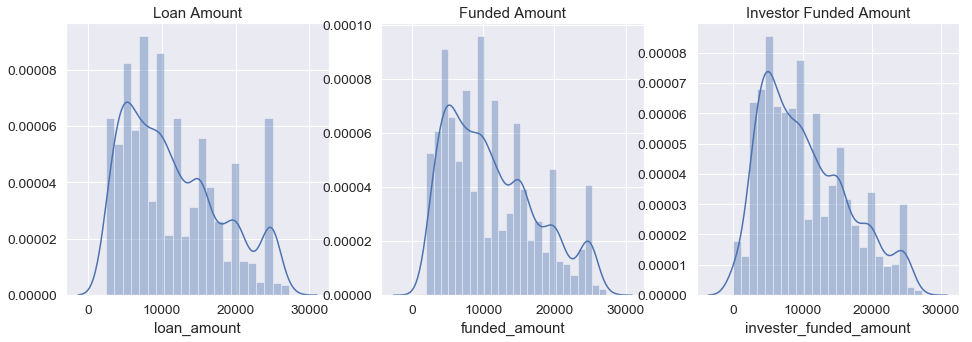

In [82]:
plt.subplots(figsize=(16,5))
# subplot 1
plt.subplot(1, 3, 1)
plt.title('Loan Amount')
sns.distplot(lclub['loan_amount'])

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Funded Amount')
sns.distplot(lclub['funded_amount'])

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Investor Funded Amount')
sns.distplot(lclub['invester_funded_amount'])

plt.show()

#The spread of the loan amount,amount funded and amount funded by investors follows the same distribution.
#This means most people are gtting loans as requested.
# Correlation matrix also shows these are highly correlated.

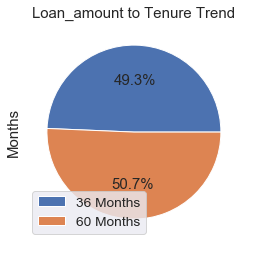

In [83]:
term_amount=lclub.groupby('term').loan_amount.sum()
plt.pie(term_amount,autopct=('%1.1f%%'))
plt.ylabel("Months")
plt.title("Loan_amount to Tenure Trend")
plt.legend(['36 Months','60 Months'],loc=3)
plt.show()
# When we compare tenures in terms of loan_amount the share of long term loans increases.
# Borrowers are taking huge loans for long tenure.

In [84]:
print('Average interest rate as per term')
term_rate_average=lclub.groupby('term').interest_rate.mean()
print(term_rate_average)
# Previoulsy we saw average interest rate was 13.5%.
# From this we see loans taken for longer duration have higher interest rate.
# Hence,Borrower shelling out more money for long duration loans.

Average interest rate as per term
term
36    12.400766
60    15.547553
Name: interest_rate, dtype: float64


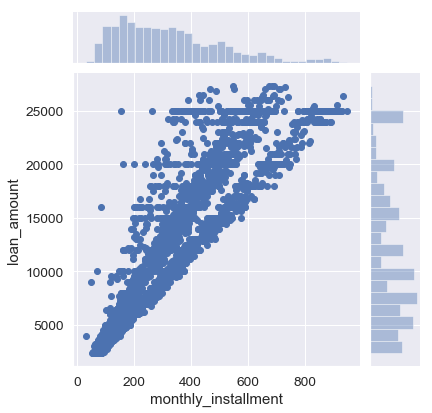

In [85]:
#sns.barplot('monthly_installment','loan_amount',data=lclub)
sns.jointplot('monthly_installment','loan_amount', lclub, kind="scatter")
plt.show()

# the plot below shows the isntallments are high for higher loan amounts and 
#variations seen are because of the interest rate trend that we saw before.


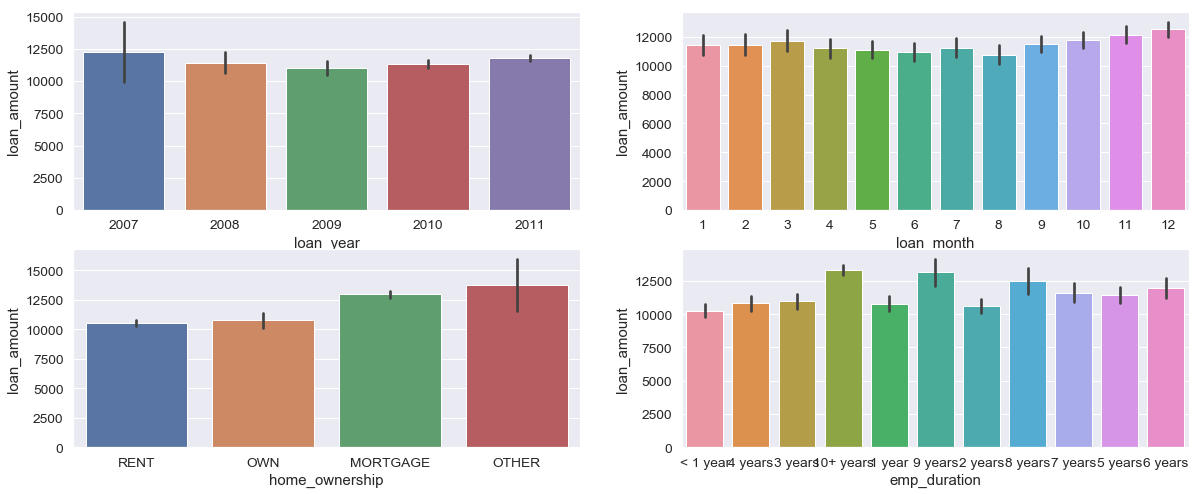

In [86]:
plt.subplots(figsize=(20,8))

plt.subplot(2, 2, 1)
sns.barplot('loan_year','loan_amount',data=lclub)
# most of the loans were given in 2011.

plt.subplot(2, 2, 2)
sns.barplot('loan_month','loan_amount',data=lclub)
# Most of the loans are given in the last quarter i.e oct-dec.

plt.subplot(2, 2, 3)
sns.barplot('home_ownership','loan_amount',data=lclub)

plt.subplot(2, 2, 4)
sns.barplot('emp_duration','loan_amount',data=lclub)

plt.show()

#All these graphs show the average loan amount and their association with various variables

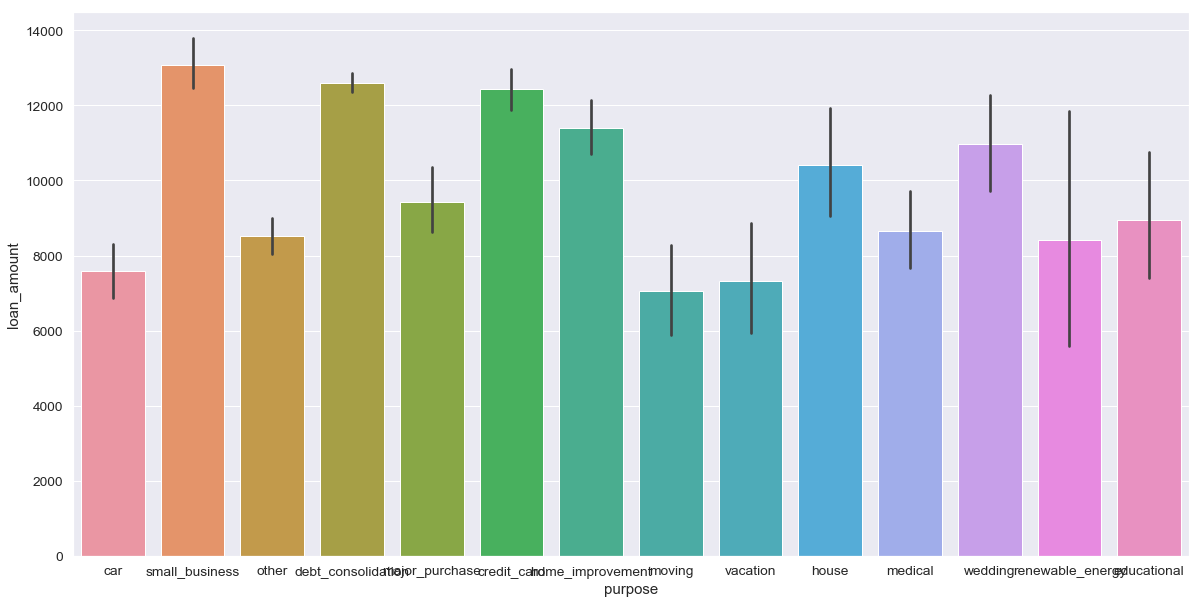

In [87]:
plt.figure(figsize=(20,10))
sns.barplot('purpose','loan_amount',data=lclub)
plt.show()

#When we compare purpose of a loan and average loan amount the top 5 purposes are house,small_business,debt_consolidation,
#credit card and home_improvement.

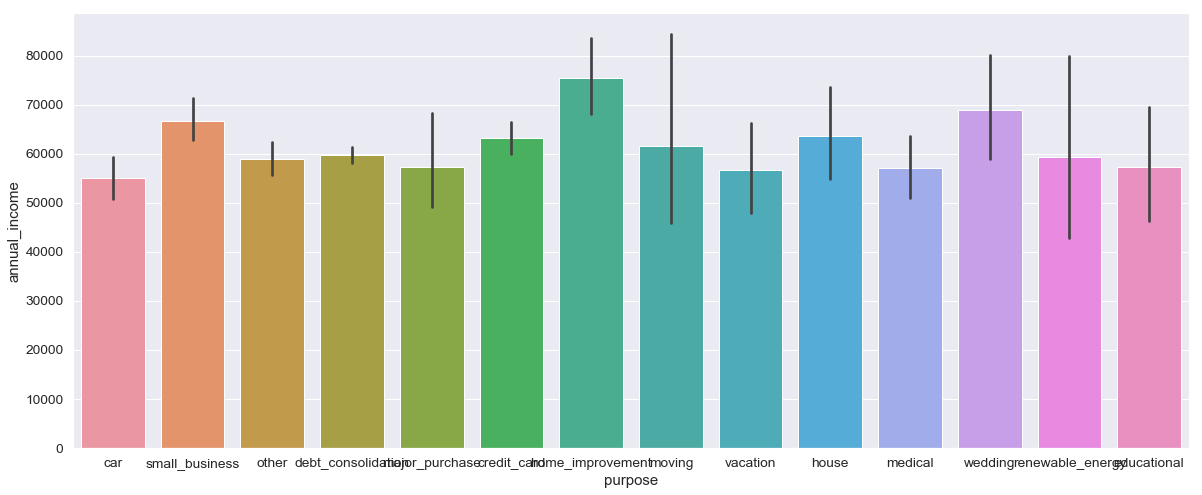

In [88]:
plt.figure(figsize=(20,8))

sns.barplot('purpose','annual_income',data=lclub)

plt.show()

#the top 5 purposes are house,small_business,debt_consolidation,credit card and wedding from previous graph.
#the people taking loans for these purposes are having average annual income as 76772.28,75062.51,67322.05,70439.15,89736.78 resp.


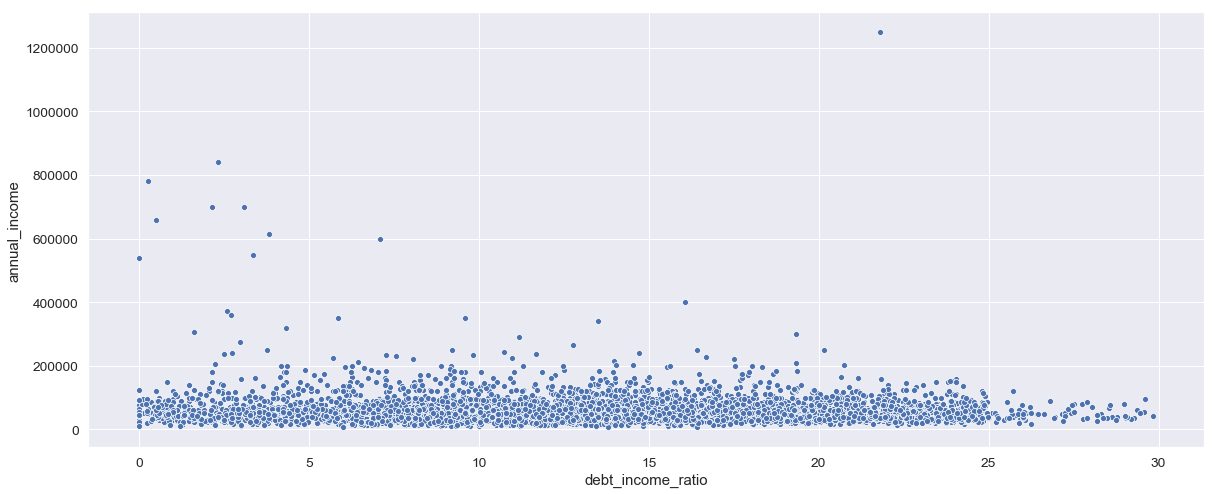

In [89]:
plt.figure(figsize=(20,8))

sns.scatterplot('debt_income_ratio','annual_income',data=lclub)

plt.show()

In [90]:
lclub.groupby('address_state').loan_amount.sum().sort_values(ascending=False)

address_state
CA    11843375
NY     5322475
FL     5151150
TX     3152950
NJ     3084250
IL     2092600
GA     2077175
VA     1823125
MA     1718575
PA     1707100
MD     1635550
OH     1550225
WA     1535175
AZ     1392175
NC     1192200
MO     1127250
MI     1081800
NV     1074725
CO      986275
CT      932450
MN      788950
WI      705125
SC      702125
OR      658275
AL      533450
OK      482500
KY      464625
UT      449925
LA      439550
KS      318750
RI      303850
NM      289425
NH      272275
AR      265175
HI      256850
WV      223175
AK      210875
SD      145300
DC      139500
DE      134750
MT       93675
VT       66700
WY       30000
TN       27500
NE       19400
MS       15000
ID        3000
Name: loan_amount, dtype: int64

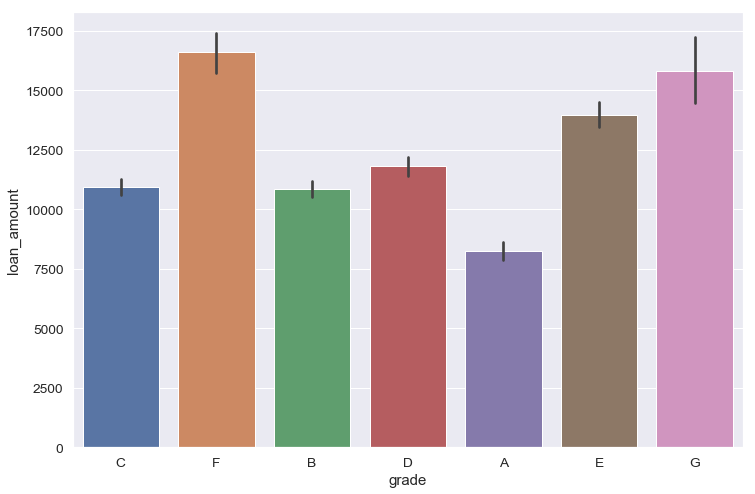

In [91]:
plt.figure(figsize=(12,8))

sns.barplot('grade','loan_amount',data=lclub)

plt.show()

In [92]:
lclub.groupby(['grade','sub_grade']).interest_rate.mean().sort_values(ascending=False)

grade  sub_grade
G      G5           21.673000
       G4           21.497273
       G3           21.395625
       G1           21.236250
       G2           21.172500
F      F5           20.678537
       F4           20.423095
       F3           19.796977
       F2           19.474754
       F1           19.377361
E      E5           18.763182
       E4           18.324911
       E3           17.962991
       E2           17.472734
       E1           16.939186
D      D5           16.824503
       D4           16.142828
       D3           15.836983
       D2           15.332213
       D1           14.858442
C      C5           14.530157
       C4           14.205657
       C3           13.675714
       C2           13.363938
       C1           12.769867
B      B5           11.802568
       B4           11.432424
       B3           11.012120
       B2           10.493204
       B1           10.044620
A      A5            8.384070
       A4            7.620949
       A3            7.

In [93]:
lclub.groupby(['grade','sub_grade']).annual_income.mean().sort_values(ascending=False)

# Most people having higher income have G and F as grades. Bank is giving more risky loans and the dataset belongs to defaulters only.

grade  sub_grade
G      G4           102605.057273
       G5            93790.000000
F      F1            80199.176806
E      E5            76040.934659
F      F2            74376.038689
G      G2            71491.166667
F      F3            71196.913721
       F4            70014.842857
E      E3            69913.783551
       E4            69852.197143
F      F5            67082.275122
G      G3            66226.937500
D      D3            65572.075431
E      E2            65527.802014
D      D5            64973.263455
B      B2            64623.891845
E      E1            64349.278081
B      B3            62260.782690
C      C4            61790.908030
       C1            61697.029900
D      D1            60813.026753
       D4            60461.580808
       D2            60460.830830
B      B4            60375.115758
C      C3            59962.630122
B      B1            56498.302532
C      C5            56267.199162
G      G1            56138.666667
A      A4            55815.9486

In [94]:
lclub.groupby(['grade','sub_grade']).loan_amount.mean().sort_values(ascending=False)

# Most people taking higher loans have G and F as grades. Bank is giving more risky loans

grade  sub_grade
G      G5           17635.000000
F      F4           17364.285714
       F3           16993.604651
G      G2           16802.083333
       G3           16645.312500
F      F5           16576.829268
       F1           16277.777778
       F2           16135.245902
E      E5           14888.352273
       E4           14884.821429
G      G1           14473.958333
E      E2           13912.050360
       E3           13893.691589
G      G4           13556.818182
D      D5           13403.403141
E      E1           12959.156977
D      D3           12571.982759
       D4           12370.202020
B      B5           11653.927492
       B4           11448.232323
C      C4           11225.252525
       C1           11057.890365
       C2           11017.808219
       C3           10938.469388
D      D2           10773.715415
B      B3           10688.765823
C      C5           10401.047120
B      B2           10115.048544
D      D1            9618.831169
B      B1            9423.

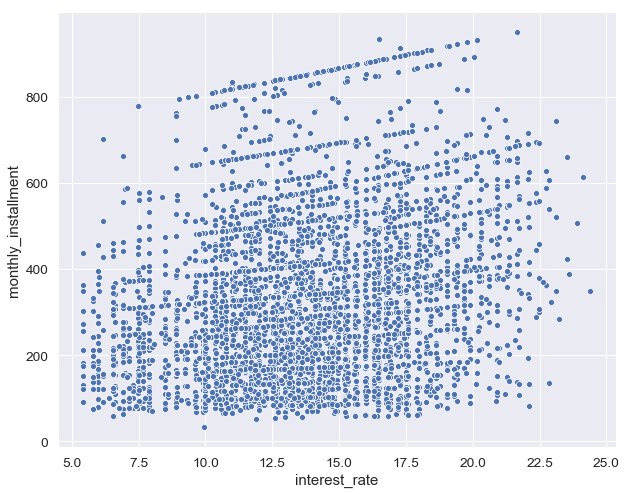

In [95]:
lclub.interest_rate.describe()
plt.figure(figsize=(10,8))
sns.scatterplot(x='interest_rate',y='monthly_installment',data=lclub)
plt.show()